In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
trips = pd.read_csv('data/trips.csv')

In [3]:
trips

,activityid,personid,modechoice
0,1,3,WALK
1,2,3,WALK
2,3,3,WALK
3,4,3,WALK
4,5,3,WALK
...,...,...,...
14047024,17147588,4113994,DRIVE_ALONE_FREE
14047025,17147589,4113994,DRIVE_ALONE_FREE
14047026,17147590,4113994,DRIVE_ALONE_FREE
14047027,17147592,4113995,SHARED_3_HOV


In [4]:
trips['modechoice'].value_counts()

DRIVE_ALONE_FREE    6156506
SHARED_2_HOV        3507285
SHARED_3_HOV        2814408
WALK                1022834
WALK_SET             214366
SCH_BUS              194123
BIKE                  69645
SHARED_3_PAY          17088
SHARED_2_PAY          15450
KNR_SET               13633
PNR_SET               11926
DRIVE_ALONE_PAY        9765
Name: modechoice, dtype: int64

In [5]:
utility = pd.read_csv('data/utilityvars.csv')

In [6]:
utility

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
0,12150818,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,...,0.0,46.447229,46.447229,46.447229,0,5,True,False,False,1
1,3018709,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,...,0.0,495.225231,495.225231,495.225231,0,1,False,False,False,1
2,8809200,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,...,0.0,462.137117,462.137117,462.137117,0,1,False,False,True,1
3,11332534,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,...,0.0,342.291418,342.291418,342.291418,0,1,False,False,False,1
4,6130767,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,...,0.0,310.186071,310.186071,310.186071,0,1,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,10138525,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,...,0.0,842.672156,842.672156,842.672156,5,5,False,False,False,5
14047025,16270294,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,...,0.0,13.350623,13.350623,13.350623,5,3,False,False,False,3
14047026,16270295,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,...,0.0,137.377041,137.377041,137.377041,5,3,False,False,False,3
14047027,10138526,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,...,0.0,5.447711,5.447711,5.447711,5,5,False,False,False,3


In [8]:
utility.isnull().sum()

activityid               0
age                      0
gender                   0
autosuf                  0
numhouseholdpersons      0
income                   0
oduden                   0
oempden                  0
ototint                  0
dempden                  0
sovdrivetime             0
hovdrivetime             0
tolldrivetime            0
tollcostsov              0
tollcosthov2             0
tollcosthov3             0
walkttime                0
walktotransitutility     0
drivetotransitutility    0
parkingcost              0
parkingwalktime          0
sovcost                  0
hovcost                  0
tollcost                 0
tourpurpose              0
tourmode                 0
firststop                0
laststop                 0
zerototalstops           0
targettripmode           0
dtype: int64

# Exploratory Data Analysis

In [31]:
# check for problem features and missing data
for col in list(trips):
    print(col,':',trips[col].unique())

activityid : [       1        2        3 ... 17147590 17147592 17147593]
personid : [      3       4       5 ... 4113993 4113994 4113995]
modechoice : ['WALK' 'SHARED_2_HOV' 'DRIVE_ALONE_FREE' 'SCH_BUS' 'SHARED_3_HOV'
 'WALK_SET' 'BIKE' 'KNR_SET' 'PNR_SET' 'DRIVE_ALONE_PAY' 'SHARED_2_PAY'
 'SHARED_3_PAY']


In [32]:
# check for problem features and missing data
for col in list(utility):
    print(col,':',utility[col].unique())

activityid : [12150818  3018709  8809200 ... 16270295 10138526 10138527]
age : [4 6 7 2 3 1 0]
gender : [ True False]
autosuf : [2 1 0]
numhouseholdpersons : [ 2  6  1  3  4  5  7  8  9 10]
income : [4 1 3 2 5]
oduden : [ 9.63319969  8.3046999  10.18949986 ... 62.67900085 58.9233017
 31.80550003]
oempden : [  11.59405804   70.11791229   47.53874588 ...  658.33776855  254.5579834
 1974.05187988]
ototint : [ 4. 12.  3.  1.  2.  6. 13. 11. 10. 25. 23. 14.  9. 24. 22. 26. 15.  8.
 27.  5. 16.  7. 18. 20. 17. 21. 19.]
dempden : [  67.65913391   32.27333832   13.56715679 ...  254.5579834     6.26534557
 1974.05187988]
sovdrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
hovdrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
tolldrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
tollcostsov : [  0.         160.26133728 201.02601624 ... 193.25448608 171.62652588
 214.60983276

<AxesSubplot:ylabel='Frequency'>

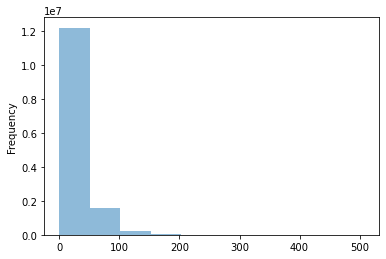

In [33]:
utility['walkttime'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

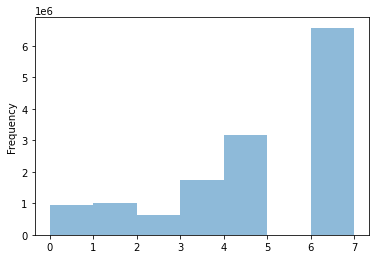

In [34]:
utility['age'].plot.hist(bins=7, alpha=0.5)

In [35]:
utility['age'].value_counts()
# we see that most people are aged 56+, followed by the age group between 25-55
# so we have little representation of the younger age group

7    3754099
4    3165495
6    2818493
3    1743774
1     994808
0     955376
2     614984
Name: age, dtype: int64

In [36]:
# activityid can be removed because it just identifies each person, not relevant for our prediction

In [37]:
utility['gender'].value_counts()
# we have around 1.2 million more females than males 

True     7630493
False    6416536
Name: gender, dtype: int64

In [38]:
utility['autosuf'].value_counts()
# most common is unsufficient vehicle count, following sufficient count, and little households that don't have vehicle

1    7330371
2    6556605
0     160053
Name: autosuf, dtype: int64

In [39]:
utility['income'].value_counts()
# distribution of income seems relatively like normal distribution
# 3 is the average of $60-100k

3    3182876
2    3170265
1    2701888
5    2643779
4    2348221
Name: income, dtype: int64

<AxesSubplot:ylabel='Frequency'>

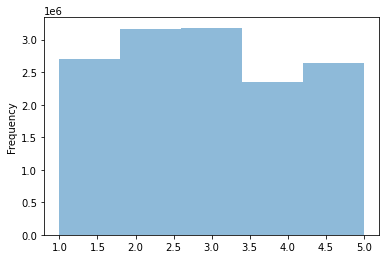

In [40]:
utility['income'].plot.hist(bins=5, alpha=0.5)

In [41]:
utility['tourpurpose'].value_counts()
# work, escort, discretionary are most common purposes of the tour
# university and work-based is the least common

0    3594540
5    3489898
4    2832591
2    1650401
3    1570662
7     425017
1     302898
6     181022
Name: tourpurpose, dtype: int64

<AxesSubplot:ylabel='Frequency'>

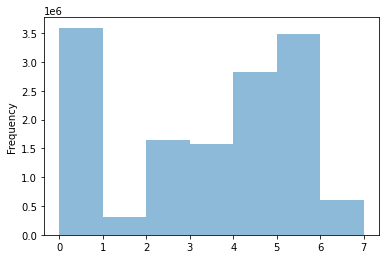

In [42]:
utility['tourpurpose'].plot.hist(bins=7, alpha=0.5)

In [43]:
utility['tourmode'].value_counts()
# driving is the most common tour modes, with park and ride and kiss and ride are least common

1     4999579
3     3891056
5     3759115
7      842413
9      235085
12     137256
8      107159
11      57661
10      17705
Name: tourmode, dtype: int64

<AxesSubplot:ylabel='Frequency'>

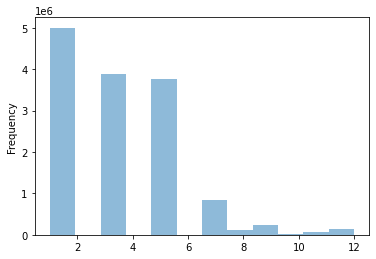

In [44]:
utility['tourmode'].plot.hist(bins=12, alpha=0.5)

In [45]:
utility['targettripmode'].value_counts()

1     6155225
3     3523141
5     2831163
7     1003774
9      213502
12     137256
8      107159
11      24315
2       20494
6       11328
10      10074
4        9598
Name: targettripmode, dtype: int64

<AxesSubplot:ylabel='Frequency'>

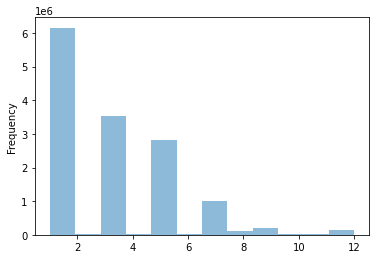

In [46]:
utility['targettripmode'].plot.hist(bins=12, alpha=0.5)

# Data Cleaning

In [7]:
# drop columns with no significant values (e.g. only 1 value, only unique values)
utility = utility.drop(columns=['activityid', 'tourmode'])
utility

,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,sovdrivetime,...,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,firststop,laststop,zerototalstops,targettripmode
0,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,5.053318,...,0.0,0.0,46.447229,46.447229,46.447229,0,True,False,False,1
1,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,31.226185,...,0.0,0.0,495.225231,495.225231,495.225231,0,False,False,False,1
2,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,30.145569,...,0.0,0.0,462.137117,462.137117,462.137117,0,False,False,True,1
3,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,24.318232,...,0.0,0.0,342.291418,342.291418,342.291418,0,False,False,False,1
4,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,25.267041,...,0.0,0.0,310.186071,310.186071,310.186071,0,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,56.546418,...,0.0,0.0,842.672156,842.672156,842.672156,5,False,False,False,5
14047025,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,1.403090,...,0.0,0.0,13.350623,13.350623,13.350623,5,False,False,False,3
14047026,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,12.287907,...,0.0,0.0,137.377041,137.377041,137.377041,5,False,False,False,3
14047027,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,1.173692,...,0.0,0.0,5.447711,5.447711,5.447711,5,False,False,False,3


In [8]:
# define categorical variables
utility['gender'] = np.where(utility['gender'] == True, 'female', 'male')

utility['autosuf'] = np.where(utility['autosuf'] == 0, 'no_vehicles', 
                                np.where(utility['autosuf'] == 1, 'insufficient', 'sufficient'))

utility['tourpurpose'] = np.where(utility['tourpurpose'] == 0, 'work', \
                                    np.where(utility['tourpurpose'] == 1, 'university', \
                                    np.where(utility['tourpurpose'] == 2, 'school', \
                                    np.where(utility['tourpurpose'] == 3, 'maintenance', \
                                    np.where(utility['tourpurpose'] == 4, 'escort', \
                                    np.where(utility['tourpurpose'] == 5, 'discretionary', \
                                    np.where(utility['tourpurpose'] == 6, 'work-based', 'cross-border')))))))

In [9]:
utility.dtypes

age                        int64
gender                    object
autosuf                   object
numhouseholdpersons        int64
income                     int64
oduden                   float64
oempden                  float64
ototint                  float64
dempden                  float64
sovdrivetime             float64
hovdrivetime             float64
tolldrivetime            float64
tollcostsov              float64
tollcosthov2             float64
tollcosthov3             float64
walkttime                float64
walktotransitutility     float64
drivetotransitutility    float64
parkingcost              float64
parkingwalktime          float64
sovcost                  float64
hovcost                  float64
tollcost                 float64
tourpurpose               object
firststop                   bool
laststop                    bool
zerototalstops              bool
targettripmode             int64
dtype: object

In [10]:
for col in list(utility):
    print(col,':',utility[col].value_counts())

age : 7    3754099
4    3165495
6    2818493
3    1743774
1     994808
0     955376
2     614984
Name: age, dtype: int64
gender : female    7630493
male      6416536
Name: gender, dtype: int64
autosuf : insufficient    7330371
sufficient      6556605
no_vehicles      160053
Name: autosuf, dtype: int64
numhouseholdpersons : 2     3478939
4     2840701
3     2466820
5     1917514
1     1273335
6     1135600
8      569690
9      262962
7       90472
10      10996
Name: numhouseholdpersons, dtype: int64
income : 3    3182876
2    3170265
1    2701888
5    2643779
4    2348221
Name: income, dtype: int64
oduden : 5.558900     81383
10.986600    48101
3.956300     44700
7.538500     42778
2.540700     29732
             ...  
49.155701        1
8.969300         1
1.324000         1
19.429501        1
31.805500        1
Name: oduden, Length: 20621, dtype: int64
oempden : 10.919112       81383
43.163792       48101
23979.982422    44700
35.341751       42619
144.660065      29732
              

In [ ]:
# define response, categorical, and numerical variables 
Y = utility['targettripmode'] - 1

X1 = utility.select_dtypes(include=['object','bool'])
X2 = utility.select_dtypes(exclude=['object','bool']).drop(columns='targettripmode')
Y

In [9]:
# show table with expanded categorical columns
expanded_data = []

for col in X1.columns:
    dummies = pd.get_dummies(X1[col], prefix=col)
    expanded_data.append(dummies)

expanded_data = pd.concat(expanded_data, axis=1)
expanded_data

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,tourpurpose_university,tourpurpose_work,tourpurpose_work-based,firststop_False,firststop_True,laststop_False,laststop_True,zerototalstops_False,zerototalstops_True
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1
3,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
14047025,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
14047026,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
14047027,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
# all variables with expanded categorical variables
data_encoded = pd.concat([expanded_data, X2, Y], axis=1)
data_encoded

In [21]:
# use weights on tourmode, which will weight more on walk time - 
# could show how much more inconvenient it is to walk/not
utility.sample(n=50000, weights='walkttime', random_state=1)

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
5765990,1669163,7,False,2,2,3,4.953200,4.424497,8.0,34.916939,...,0.0,124.246268,124.246268,124.246268,5,3,False,False,False,3
10197295,3975311,3,False,2,5,4,19.268801,117.837265,13.0,319.509674,...,0.0,921.638728,921.805627,921.638728,0,1,False,False,False,1
714,6111824,3,False,1,2,2,11.703000,24.352190,3.0,34.791630,...,0.0,80.999723,80.999723,80.999723,2,1,False,False,True,1
3921242,16977736,7,True,1,2,5,5.558900,10.919112,12.0,10.224158,...,0.0,65.668333,65.668333,65.668333,7,7,True,False,False,1
1679428,16473962,3,False,2,1,1,1.160300,141.827942,17.0,61.009068,...,0.0,27.187656,27.187656,27.187656,1,1,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9300289,13627002,4,False,2,2,5,2.066800,27.348284,10.0,3.799550,...,0.0,253.746636,253.746636,253.746636,0,1,False,False,False,1
12879983,7131104,7,True,2,1,3,2.100100,7.162939,2.0,16.391285,...,0.0,299.233020,299.389806,299.233020,0,1,False,False,False,1
6920109,4248838,7,False,1,2,4,3.274100,10.970346,27.0,192.898834,...,0.0,343.241054,343.241054,343.241054,0,1,False,False,True,1
5772311,2205872,3,False,2,4,2,11.616200,25.322632,6.0,507.650848,...,0.0,262.606049,262.606049,262.606049,2,3,False,False,False,3


In [23]:
# changing subsamples to remove weight and adjust random state
mode1 = utility[utility['targettripmode']==1].sample(n=1000, random_state=42)
mode2 = utility[utility['targettripmode']==2].sample(n=1000, random_state=42)
mode3 = utility[utility['targettripmode']==3].sample(n=1000, random_state=42)
mode4 = utility[utility['targettripmode']==4].sample(n=1000, random_state=42)
mode5 = utility[utility['targettripmode']==5].sample(n=1000, random_state=42)
mode6 = utility[utility['targettripmode']==6].sample(n=1000, random_state=42)
mode7 = utility[utility['targettripmode']==7].sample(n=1000, random_state=42)
mode8 = utility[utility['targettripmode']==8].sample(n=1000, random_state=42)
mode9 = utility[utility['targettripmode']==9].sample(n=1000, random_state=42)
mode10 = utility[utility['targettripmode']==10].sample(n=1000, random_state=42)
mode11 = utility[utility['targettripmode']==11].sample(n=1000, random_state=42)
mode12 = utility[utility['targettripmode']==12].sample(n=1000, random_state=42)

In [24]:
combined_subsamples = pd.concat([mode1,mode2,mode3,mode4,mode5,mode6,mode7,mode8,mode9,mode10,mode11,mode12], axis=0)

In [25]:
combined_subsamples

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
13679295,10671627,6,False,1,6,2,3.1199,41.955578,11.0,36.499100,...,0.0,43.143125,43.143125,43.143125,6,1,False,False,False,1
6483604,9191852,3,False,2,8,2,3.0683,49.342838,21.0,28.919132,...,0.0,378.453974,378.453974,378.453974,0,1,False,False,True,1
11620444,2057248,7,False,1,2,3,9.3584,118.646187,6.0,96.452827,...,0.0,8.138877,8.138877,8.138877,5,1,True,False,False,1
5904902,9662722,6,True,2,5,1,1.8433,30.338408,25.0,16.809288,...,0.0,13.497393,13.497393,13.497393,4,3,False,False,True,1
5740018,9933494,7,True,2,2,2,0.4375,5.188427,26.0,12.316857,...,0.0,132.980300,132.980300,132.980300,5,1,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599292,106350,3,False,1,4,4,6.2712,15.245072,8.0,67.676628,...,0.0,84.434974,84.434974,84.434974,2,12,False,False,True,12
2172240,9460655,3,True,1,4,1,10.3262,44.302193,12.0,20.997007,...,0.0,163.927262,163.927262,183.938831,2,12,False,False,True,12
2010650,7550683,1,True,1,8,3,7.5839,15.740391,1.0,24.217110,...,0.0,10.671094,10.671094,10.671094,2,12,False,False,True,12
2012974,5781304,2,True,0,4,2,10.6652,69.321037,3.0,35.252476,...,0.0,103.257445,103.257445,103.257445,2,12,False,False,True,12


In [ ]:
# rearrange into data array for training
data_array = combined_subsamples.values

X = data_array[:, 0:(data_array.shape[1]-1)]
Y = data_array[:,(data_array.shape[1]-1)]
print(X)
print(Y)

# Model Building

In [ ]:
# split into train and test sets 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# build xgboost classifier for multiclassification
xgb_model = XGBClassifier(objective='multi:softprob',eval_metric='auc',num_class=12,use_label_encoder=False)
xgb_model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose=0)

# Evaluation

In [1]:
xgb_model.evals_result()

NameError: name 'xgb_model' is not defined

In [ ]:
# plot training and teating accuracies 

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis,results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

In [ ]:
y_pred = xgb_model.predict(X_test) 
y_pred = [round(value) for value in y_pred]

In [ ]:
# Evaluation of the model
metrics.multilabel_confusion_matrix(y_test, y_pred)

In [ ]:
# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

In [ ]:
# sensitivity
sensitivity = metrics.recall_score(y_test, y_pred, average = 'macro')
sensitivity

In [ ]:
# precision
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
precision

In [ ]:
# F1-score
f1 = (2 * precision * sensitivity) / (precision + sensitivity)
f1

In [ ]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'drive_alone_free', 
                                        1: 'drive_alone_pay', 
                                        2: 'hov2_free',
                                        3: 'hov2_pay',
                                        4: 'hov3_free',
                                        5: 'hov3_pay',
                                        6: 'walk',
                                        7: 'bike',
                                        8: 'walk_to_transit',
                                        9: 'park_ride',
                                        10: 'kiss_ride',
                                        11: 'school_bus'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

In [ ]:
plot_ROC_curve(xgb_model, X_train, y_train, X_test, y_test)

# Feature Importance

In [ ]:
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel

In [ ]:
print(xgb_model.feature_importances_)

In [ ]:
pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
pyplot.show()

In [ ]:
xgb_model.get_booster().feature_names = list(data_encoded.columns)[:-1]
fig, ax = pyplot.subplots(figsize=(5, 10))
plot_importance(xgb_model.get_booster(), ax=ax)
pyplot.show()

# Validation Pipeline

In [ ]:
trips['modechoice'].value_counts()

In [ ]:
# One-hot encode the categorical variables (the variables only include 0 and -1 don't need to be encoded)
new_utilityvars = pd.get_dummies(combined_subsamples, columns=["tourpurpose", "tourmode"], prefix=["tourpurpose", "tourmode"])
new_utilityvars

In [ ]:
# Build XGBoost tree model
new_utilityvars = pd.merge(new_utilityvars.drop(['targettripmode'], axis=1), new_utilityvars[['targettripmode']], left_index=True, right_index=True, how="outer")
new_utilityvars

In [ ]:
df_array = new_utilityvars.values
X = df_array[:,0:44]
Y = df_array[:,44]

In [ ]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose = 0)

In [ ]:
y_pred = [round(value) for value in model.predict(X_test)]
y_test = [round(value) for value in y_test]

In [ ]:
# multilabel confusion matrix
metrics.multilabel_confusion_matrix(y_test, y_pred)

In [ ]:
# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

In [ ]:
# sensitivity
sensitivity = metrics.recall_score(y_test, y_pred, average = 'macro')
sensitivity

In [ ]:
# precision
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
precision

In [ ]:
# F1-score
f1 = (2 * precision * sensitivity) / (precision + sensitivity)
f1

In [ ]:
# 13*13 confusion matrix
metrics.confusion_matrix(y_test, y_pred)

In [ ]:
# normalized confusion matrix
# metrics.confusion_matrix(y_test, y_pred)[11] / sum(metrics.confusion_matrix(y_test, y_pred)[11])